<a href="https://colab.research.google.com/github/ProfessorAbraham/solar-challenge-week1/blob/eda-togo/notebooks/eda_togo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Replace with your actual GitHub repo
!git clone https://github.com/professorAbraham/solar-challenge-week1.git
%cd solar-challenge-week1


Cloning into 'solar-challenge-week1'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 29 (delta 5), reused 25 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 4.85 KiB | 4.85 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/solar-challenge-week1


In [36]:
!git checkout -b eda-togo

Switched to a new branch 'eda-togo'


In [48]:
!git commit -m "feat: EDA on eda-togo dataset - summary and cleaning"

[eda-togo 6ff5b56] feat: EDA on eda-togo dataset - summary and cleaning
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 notebooks/eda-togo.ipynb


In [50]:
!git push -u origin eda-togo

Branch 'eda-togo' set up to track remote branch 'eda-togo' from 'origin'.
Everything up-to-date


In [47]:
!git add notebooks/eda-togo.ipynb

In [37]:
import pandas as pd
df = pd.read_csv("/content/solar-challenge-week1/data/togo-dapaong_qc.csv")

In [38]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [39]:
df.describe()
df.isna().sum() / len(df) * 100

,0
Timestamp,0.0
GHI,0.0
DNI,0.0
DHI,0.0
ModA,0.0
ModB,0.0
Tamb,0.0
RH,0.0
WS,0.0
WSgust,0.0


In [40]:
from scipy.stats import zscore

z_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_z = df[z_cols].apply(zscore)
outliers = (df_z.abs() > 3).sum()
outliers

,0
GHI,305
DNI,1062
DHI,3415
ModA,137
ModB,206
WS,3510
WSgust,3915


In [41]:
df_cleaned = df.copy()
for col in z_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

In [43]:
df_cleaned.to_csv("eda-togo.csv", index=False)

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


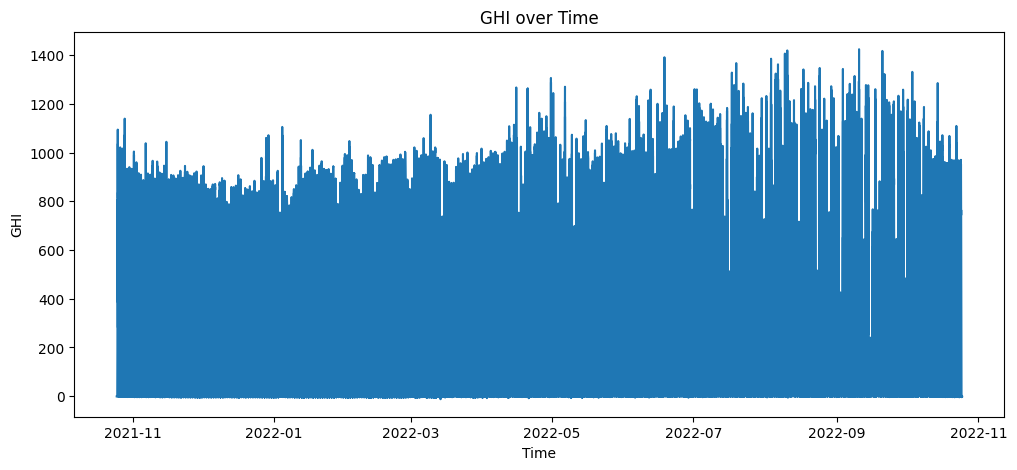

In [45]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # if not already datetime
plt.figure(figsize=(12,5))
plt.plot(df['Timestamp'], df['GHI'])
plt.title('GHI over Time')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.show()

## Sierra Leone is finished here ❤